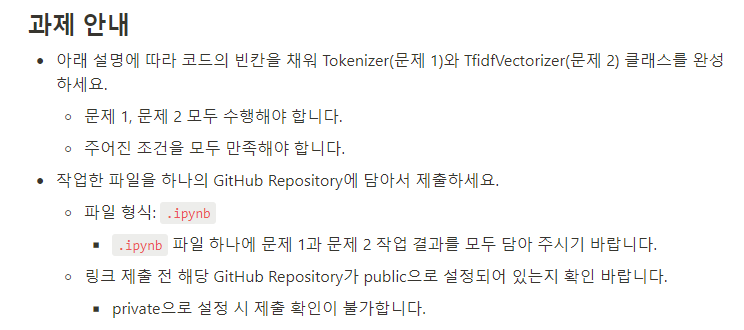

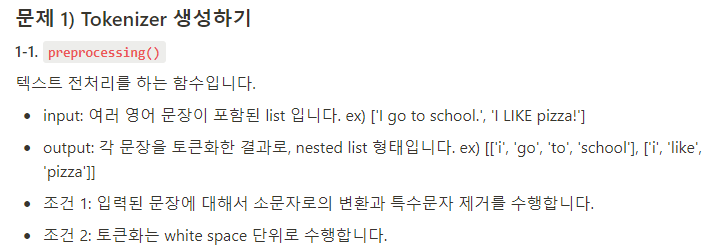

In [7]:
import re

class Tokenizer():
    def __init__(self):
        self.word_dict = {'oov': 0}
        self.fit_checker = False
  
    def preprocessing(self, sequences):
        result = []
        for x in sequences:
            x = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', x).lower()     # 특수문자 제거 후 소문자 변환
            result.append(x.split(' '))                                                             # 리스트에 추가
        return result

In [8]:
example = ['I go to school.', 'I LIKE pizza!']

token = Tokenizer()
token.preprocessing(example)

[['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]

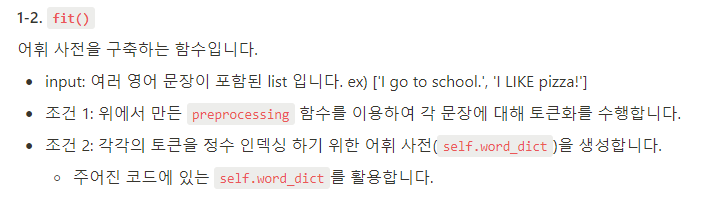

In [9]:
class Tokenizer():
    def __init__(self):
        self.word_dict = {'oov': 0}
        self.fit_checker = False
        
    def preprocessing(self, sequences):
        result = []
        for x in sequences:
            x = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', x).lower()     # 특수문자 제거 후 소문자 변환
            result.append(x.split(' '))                                                             # 리스트에 추가
        return result
    
    def fit(self, sequences):
        self.fit_checker = False
        
        token = self.preprocessing(sequences)
        for x in token:
            for i in range(len(x)):
                if x[i] not in self.word_dict:                                    # 단어가 사전에 이미 존재하지 않을때만
                    self.word_dict[x[i]] = len(self.word_dict)                     # word_dict에 순차적으로 단어,인덱스 추가
                       
        self.fit_checker = True


In [10]:
example = ['I go to school.', 'I LIKE pizza!']

token = Tokenizer()
token.fit(example)
token.word_dict

{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6}

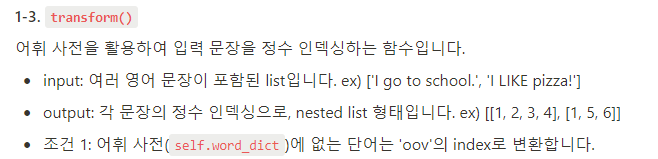

In [11]:
class Tokenizer():
    def __init__(self):
        self.word_dict = {'oov': 0}
        self.fit_checker = False
        
    def preprocessing(self, sequences):        
        result = []
        for x in sequences:
            x = re.sub('[-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·]', '', x).lower()     # 특수문자 제거 후 소문자 변환
            result.append(x.split(' '))                                                             # 리스트에 추가
        return result
    
    def fit(self, sequences):
        self.fit_checker = False
        
        token = self.preprocessing(sequences)
        for x in token:
            for i in range(len(x)):
                if x[i] not in self.word_dict:                          # 단어가 사전에 이미 존재하지 않을때만
                    self.word_dict[x[i]] = len(self.word_dict)           # word_dict에 순차적으로 단어,인덱스 추가
                       
        self.fit_checker = True
        
    def transform(self, sequences):
        result = []
        tokens = self.preprocessing(sequences)
        if self.fit_checker:                                             # if True (fit이 된 경우)
            for x in tokens:
                token = []
                for i in range(len(x)):
                    if x[i] not in self.word_dict:                      # 사전에 없는 단어라면 'oov'의 인덱스로 변환
                        token.append(self.word_dict['oov'])
                    else:
                        token.append(self.word_dict[x[i]])               # 있다면 인덱스 출력
                result.append(token)
            return result
        else:
            raise Exception("Tokenizer instance is not fitted yet.")
      
    def fit_transform(self, sequences):
        self.fit(sequences)
        result = self.transform(sequences)
        return result

In [12]:
# fit함수를 실행하지 않았을때
example = ['I go to school.', 'I LIKE pizza!']

token = Tokenizer()
token.transform(example)

Exception: Tokenizer instance is not fitted yet.

In [13]:
# fit함수 실행
example = ['I go to school.', 'I LIKE pizza!']

token = Tokenizer()
token.fit(example)
token.transform(example)

[[1, 2, 3, 4], [1, 5, 6]]

In [14]:
# fit_transform 사용하였을때
example = ['I go to school.', 'I LIKE pizza!']

token = Tokenizer()
token.fit_transform(example)

[[1, 2, 3, 4], [1, 5, 6]]

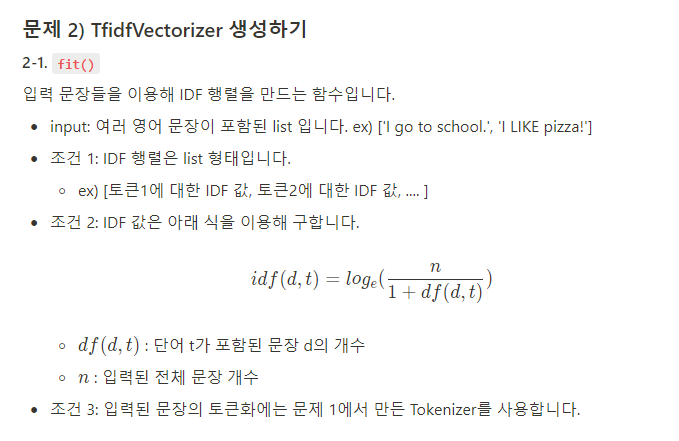

In [15]:
from collections import Counter
import math

class TfidfVectorizer:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        self.fit_checker = False
  
    def fit(self, sequences):
        count = Counter({})
        tokenized = self.tokenizer.fit_transform(sequences)
        # IDF
        idf_list = []
        for i in range(len(tokenized)):
            count += Counter(tokenized[i])           # 단어t가 포함된 문장개수
        for v,i in count.items():
            idf_list.append(math.log(len(tokenized)/(1+i)))   # idf 값 리스트
            
        self.fit_checker = True
        return idf_list

In [16]:
example = ['I go to school.', 'I LIKE pizza!']

tokenizer = Tokenizer()
tf_idf = TfidfVectorizer(tokenizer)
tf_idf.fit(example)

[-0.40546510810816444, 0.0, 0.0, 0.0, 0.0, 0.0]

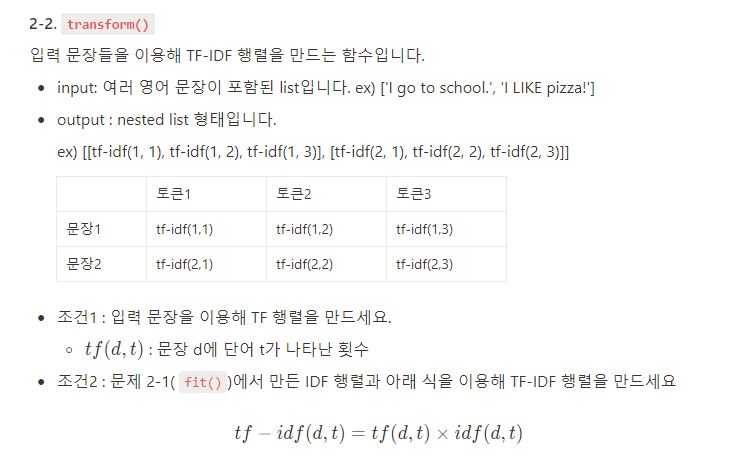

In [17]:
class TfidfVectorizer:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer
        self.fit_checker = False
        
    def fit(self, sequences):
        count = Counter({})
        tokenized = self.tokenizer.fit_transform(sequences)
        # IDF
        idf_list = []
        for i in range(len(tokenized)):
            count += Counter(tokenized[i])           # 단어t가 포함된 문장개수
        for v,i in count.items():
            idf_list.append(math.log(len(tokenized)/(1+i)))   # idf 값 리스트
            
        self.fit_checker = True
        return idf_list

    def transform(self, sequences):
        if self.fit_checker:                                  # if True(fit이 된 경우)
            tokenized = self.tokenizer.transform(sequences)
            # TF_IDF
            for x in tokenized:
                for i in range(len(x)):
                    tf = x.count(x[i])                        # TF
                    idf = self.fit(sequences)[x[i]-1]         # IDF
                    x[i] = tf*idf
            self.tfidf_matrix = tokenized
            
            return self.tfidf_matrix
        else:                                                 # if False(fit하지 않은 경우)
            raise Exception("TfidfVectorizer instance is not fitted yet.")


    def fit_transform(self, sequences):
        self.fit(sequences)
        return self.transform(sequences)

In [18]:
# fit함수 실행하지 않았을때
example = ['I go to school.', 'I LIKE pizza!']

tokenizer = Tokenizer()
tf_idf = TfidfVectorizer(tokenizer)
tf_idf.transform(example)

Exception: TfidfVectorizer instance is not fitted yet.

In [19]:
# fit + transform
example = ['I go to school.', 'I LIKE pizza!']

tokenizer = Tokenizer()
tf_idf = TfidfVectorizer(tokenizer)
tf_idf.fit(example)
tf_idf.transform(example)

[[-0.40546510810816444, 0.0, 0.0, 0.0], [-0.40546510810816444, 0.0, 0.0]]

In [20]:
# fit_transform
example = ['I go to school.', 'I LIKE pizza!']

tokenizer = Tokenizer()
tf_idf = TfidfVectorizer(tokenizer)
tf_idf.fit_transform(example)

[[-0.40546510810816444, 0.0, 0.0, 0.0], [-0.40546510810816444, 0.0, 0.0]]